# 📦 Store Sales Forecasting – Prophet Model

🔄 **Note:**  
This notebook is a **continuation of the Store Sales Forecasting Project**, where the focus now shifts from exploratory analysis to **time series forecasting** using the **Prophet model**.

In the previous notebook (`Store Sales Forcasting.ipynb`), we:
- Performed data cleaning and feature extraction
- Conducted exploratory data analysis (EDA)
- Identified trends in profit, discounting, delivery delays, and segment performance

📌 This notebook focuses on:
- Preparing the time series data
- Implementing Prophet for sales forecasting
- Evaluating the model and visualizing future predictions

For full context, please refer to the previous file:  
📄 `Store Sales Forcasting.ipynb`


In [2]:
# Loading libraires
import pandas as pd
import matplotlib.pyplot as plt

# loading dataset
df=pd.read_csv('stores_sales_forecasting.csv', encoding='%latin1')

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet
daily_sales.columns = ['ds', 'y']


In [3]:
# Remove zero or negative sales (if needed)
daily_sales = daily_sales[daily_sales['y'] > 0]

In [4]:
# Use 90% for training
train_size = int(len(daily_sales) * 0.9)
train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]


In [5]:
# implenmtating of prophet model
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(train)


13:31:20 - cmdstanpy - INFO - Chain [1] start processing
13:31:20 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Create future dates for forecasting
future = model.make_future_dataframe(periods=len(test))  # forecast as many as test rows

# Predict
forecast = model.predict(future)


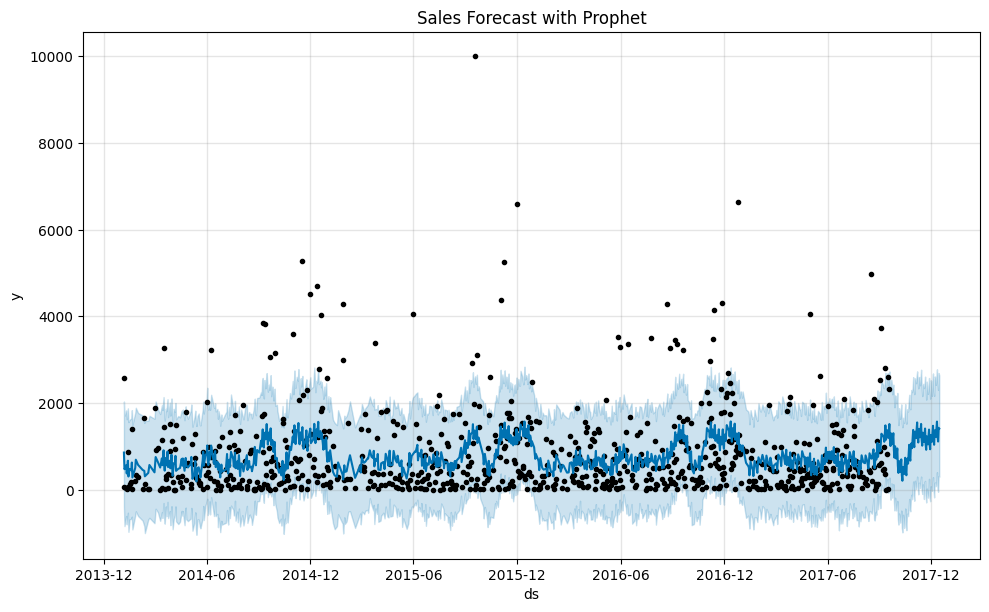

In [12]:
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.show()


This plot shows the Prophet model's forecast of daily sales over time:

Black dots represent the actual historical sales data.

The blue line indicates the model's predicted sales trend.

The light blue shaded area shows the model’s uncertainty interval (confidence range).

Key Observations: <br>
The model captures seasonal fluctuations and sales cycles quite well, especially during the latter half of the timeline.

There is a consistent central trend in predicted values, with slight increases toward the end, indicating potential growth.

Spikes in actual sales (black dots above 4000+) represent outliers or high-demand days, which Prophet captures within the uncertainty range but not exactly — which is expected in time series forecasting.

The forecast is smoother than raw data, which is typical, as the model generalizes to reduce noise.

✅ Results:
The Prophet model provides a stable and interpretable forecast, effectively capturing the underlying sales trend and seasonal effects. While it doesn’t predict extreme spikes perfectly, it delivers valuable insights for planning inventory, staffing, or promotions.

In [41]:
# Drop rows with NaN in 'y' or 'yhat'
comparison_clean = comparison.dropna(subset=['y', 'yhat'])

# Now calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(comparison_clean['y'], comparison_clean['yhat']))
print(f"RMSE: {rmse:.2f}")


RMSE: 1931.84


In [43]:
print(f"Original rows: {len(comparison)}")
print(f"After dropna: {len(comparison_clean)}")


Original rows: 208
After dropna: 208


 **Interpretation**:

An RMSE of 1931.84 means that, on average, the model’s daily sales predictions deviate from the actual values by about 1932 units.

This value reflects the model's performance across the entire time series including normal fluctuations and occasional high outlier days.

While Prophet captures the overall trend and seasonality well, high RMSE may result from large spikes in the actual data (outliers), which the model naturally smooths over.

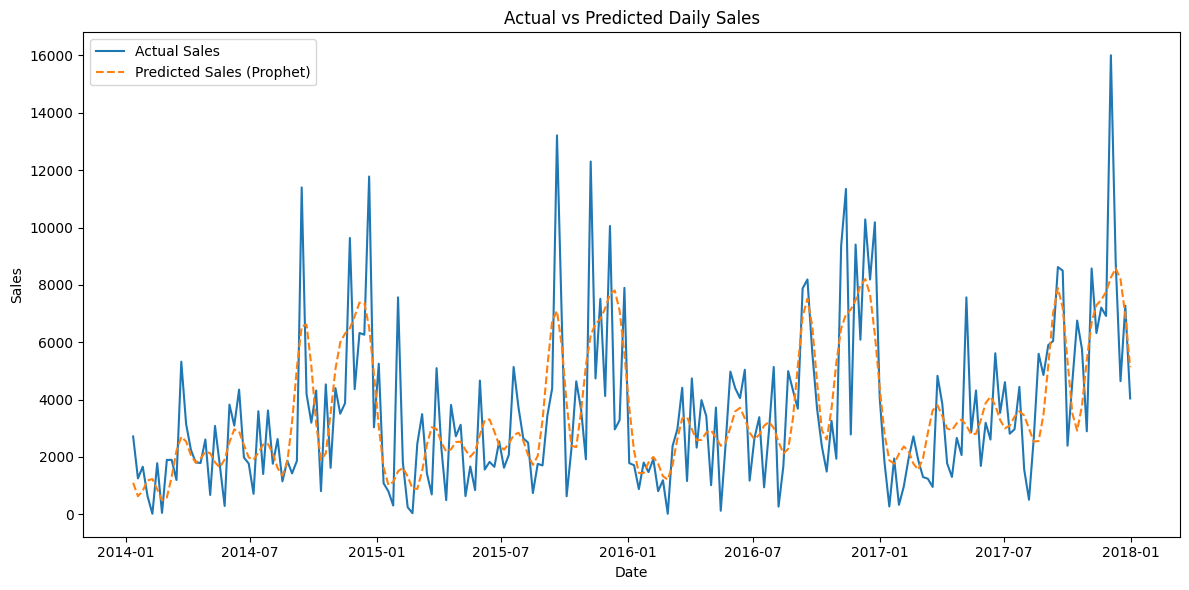

In [45]:
import matplotlib.pyplot as plt

# 
comparison_clean = comparison.dropna(subset=['y', 'yhat'])

plt.figure(figsize=(12, 6))
plt.plot(comparison_clean.index, comparison_clean['y'], label='Actual Sales')
plt.plot(comparison_clean.index, comparison_clean['yhat'], label='Predicted Sales (Prophet)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Daily Sales')
plt.legend()
plt.tight_layout()
plt.show()


### 📈 **Actual vs Predicted Daily Sales (Prophet)**

This plot illustrates the comparison between:

* **Actual Sales** (solid blue line)
* **Predicted Sales by Prophet** (dashed orange line)

#### 🔍 Key Observations:

* The Prophet model **follows the overall trend** of the actual sales fairly well, including seasonal patterns and major increases around key time periods.
* The model **smooths over sharp spikes**, especially extreme peaks in actual sales, which is common in time series forecasting.
* During high-sales periods (e.g., late 2014, early 2015, and year-end seasons), the model **captures the direction of growth**, but not always the magnitude.
* In lower activity periods, the model's predictions align more closely with actual values.

####  Result:

* The Prophet model provides a **stable forecast** that captures the seasonality and direction of daily sales effectively.
* While it may not capture **sharp spikes or anomalies**, it is well-suited for **long-term trend forecasting** and **resource planning** in retail environments.

In [47]:
# MAPE: mean of the absolute percentage errors
mape = (abs((comparison_clean['y'] - comparison_clean['yhat']) / comparison_clean['y'])).mean() * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 171.03%


**Interpretation**:
A MAPE of 171.03% indicates that, on average, the model's predictions are 171% off from the actual sales values.

This is considered very high, suggesting that the model has difficulty accurately forecasting individual daily sales values especially due to:

Extreme variability in the sales data (large spikes and outliers)

Possible lack of key regressors (e.g., holidays, store-specific effects, promotions)

**Result**:
While the Prophet model captures seasonal trends and long-term direction, it struggles with precise daily predictions. This high MAPE indicates the need to:
- Engineer additional features (e.g., event/holiday flags)
- Possibly forecast at a higher aggregation level (e.g., weekly or monthly) for smoother performance

# Forecast for monthly

C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\3625630616.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:18 - cmdstanpy - INFO - Chain [1] start processing
13:41:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


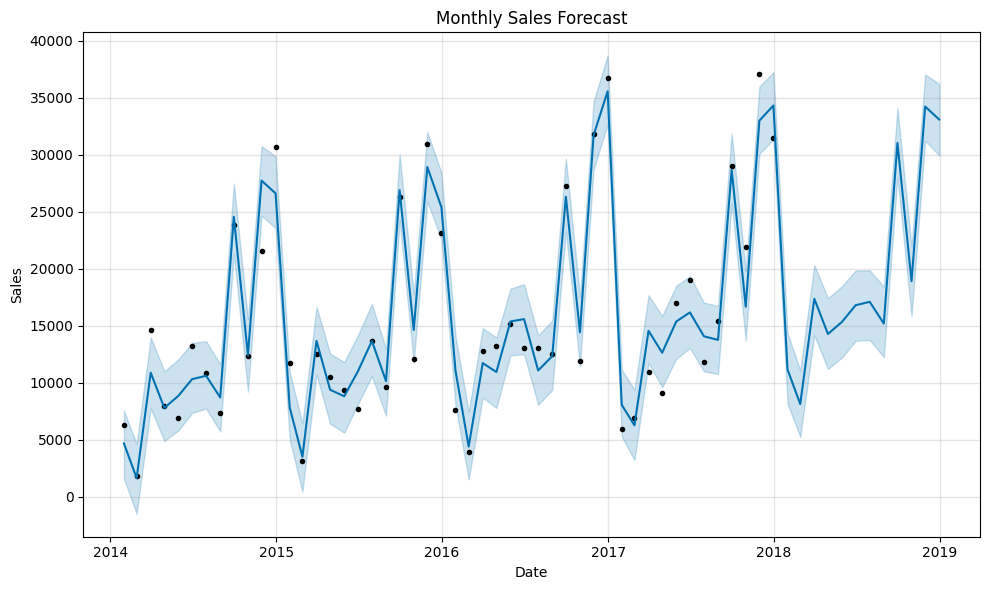

In [50]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Year-Month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

# Fit Prophet on monthly data
from prophet import Prophet
monthly_model = Prophet()
monthly_model.fit(monthly_sales)

# Forecast next 12 months
future_months = monthly_model.make_future_dataframe(periods=12, freq='M')
forecast_months = monthly_model.predict(future_months)

# Plot forecast
monthly_model.plot(forecast_months)
plt.title("Monthly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


### 📆 **Monthly Sales Forecast – Prophet Model**

This chart presents the **forecasted monthly sales** generated by the Prophet model, compared with actual monthly aggregated sales:

* **Black dots** represent actual monthly sales data.
* The **blue line** shows the Prophet model’s predicted sales values.
* The **shaded blue region** reflects the model’s confidence interval (uncertainty bounds).


###  **Insights:**

* The Prophet model effectively captures **strong seasonality** in sales with consistent upward peaks occurring yearly.
* A **general upward trend** is observed over the years, which the model picks up well.
* While some **extreme monthly sales spikes** are slightly underestimated, they still fall within the **uncertainty band**, indicating a well-calibrated forecast.
* The prediction for late 2018 and beyond reflects continued **seasonal growth** with increasing amplitude.

### **Result:**

* This monthly forecast provides **valuable insights for long-term planning**, inventory management, and marketing timing.
* Aggregating to the monthly level **significantly reduces noise**, improving forecast stability compared to daily granularity.

  * Holiday/event regressors
  * Store or region-specific modeling
  * Promotional campaign indicators


In [52]:
# Merge actual and predicted for available months only
actual = monthly_sales.set_index('ds')
predicted = forecast_months[['ds', 'yhat']].set_index('ds')
monthly_comparison = actual.join(predicted, how='left')

# Drop NaNs (forecasted months will have NaNs in 'y')
monthly_comparison_clean = monthly_comparison.dropna(subset=['y', 'yhat'])

# ✅ RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_monthly = sqrt(mean_squared_error(monthly_comparison_clean['y'], monthly_comparison_clean['yhat']))
print(f"📉 Monthly RMSE: {rmse_monthly:.2f}")

# ✅ MAPE
mape_monthly = (abs((monthly_comparison_clean['y'] - monthly_comparison_clean['yhat']) / monthly_comparison_clean['y'])).mean() * 100
print(f"📊 Monthly MAPE: {mape_monthly:.2f}%")


📉 Monthly RMSE: 2370.76
📊 Monthly MAPE: 14.66%


### 📊 Monthly Forecast Evaluation – RMSE & MAPE

To evaluate the accuracy of the Prophet model at the **monthly aggregation level**, the following error metrics were calculated:

- **RMSE (Root Mean Squared Error):** `2370.76`
- **MAPE (Mean Absolute Percentage Error):** `14.66%`


#### Interpretation:

- An **RMSE of 2370.76** means that, on average, the monthly sales predictions deviate from the actual values by about **2,371 units**.
- A **MAPE of 14.66%** indicates that the model’s predictions are, on average, within **15% of the actual monthly sales** — which is considered **strong forecasting performance** in retail settings.
- Compared to the daily forecast (MAPE ~171%), this monthly-level forecast demonstrates **dramatically improved accuracy and stability**, thanks to reduced noise and volatility.



###  Conclusion:

- The Prophet model performs **much more reliably at the monthly level**, making it more suitable for **executive reporting**, **inventory planning**, and **seasonal strategy decisions**.
- These metrics confirm that **aggregating data by month is a practical and effective approach** when the goal is trend-level accuracy over spike-level sensitivity.



C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\830021045.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:20 - cmdstanpy - INFO - Chain [1] start processing
13:41:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


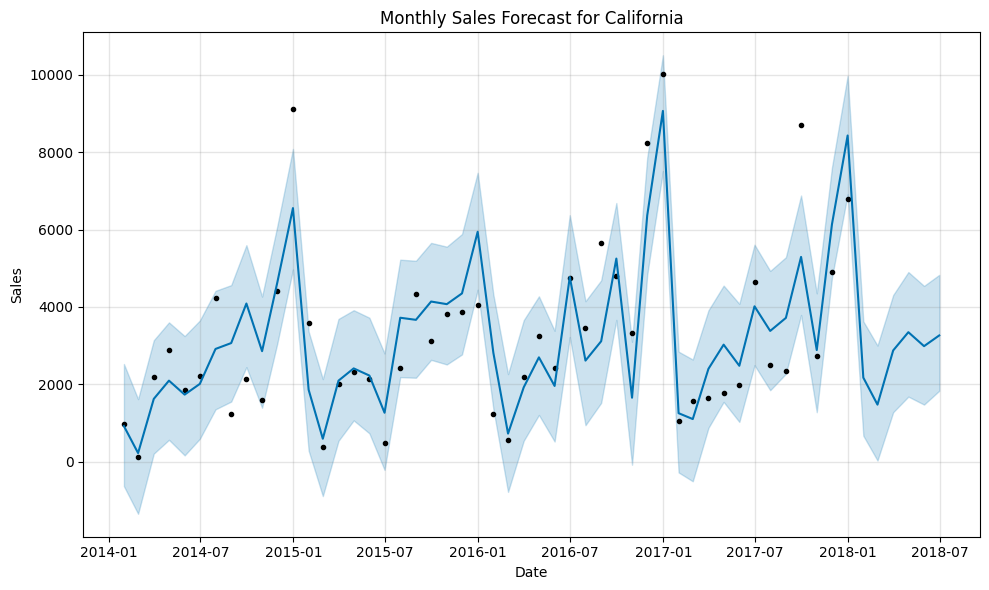

C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\830021045.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:21 - cmdstanpy - INFO - Chain [1] start processing
13:41:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


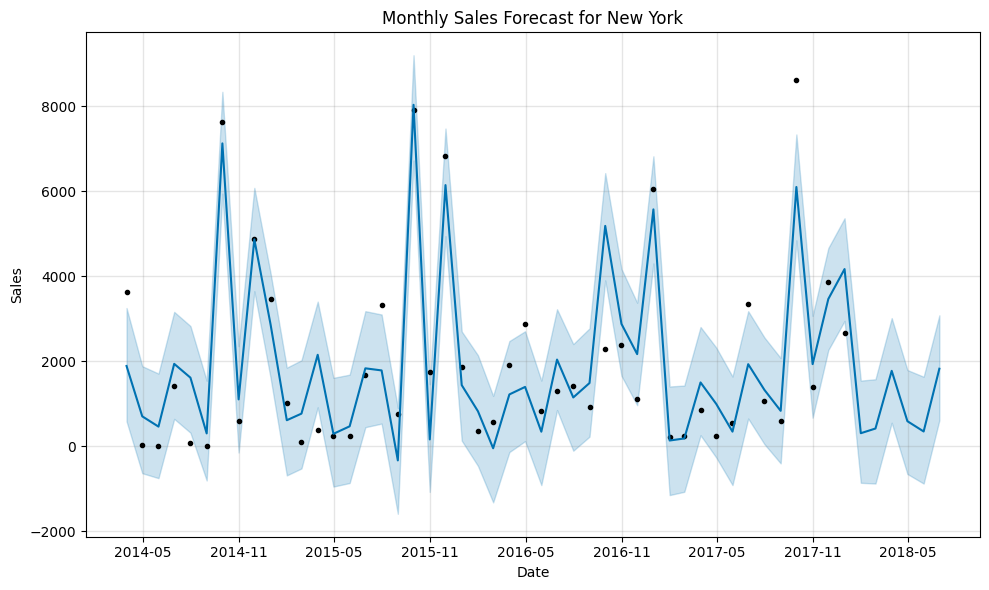

C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\830021045.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:21 - cmdstanpy - INFO - Chain [1] start processing
13:41:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


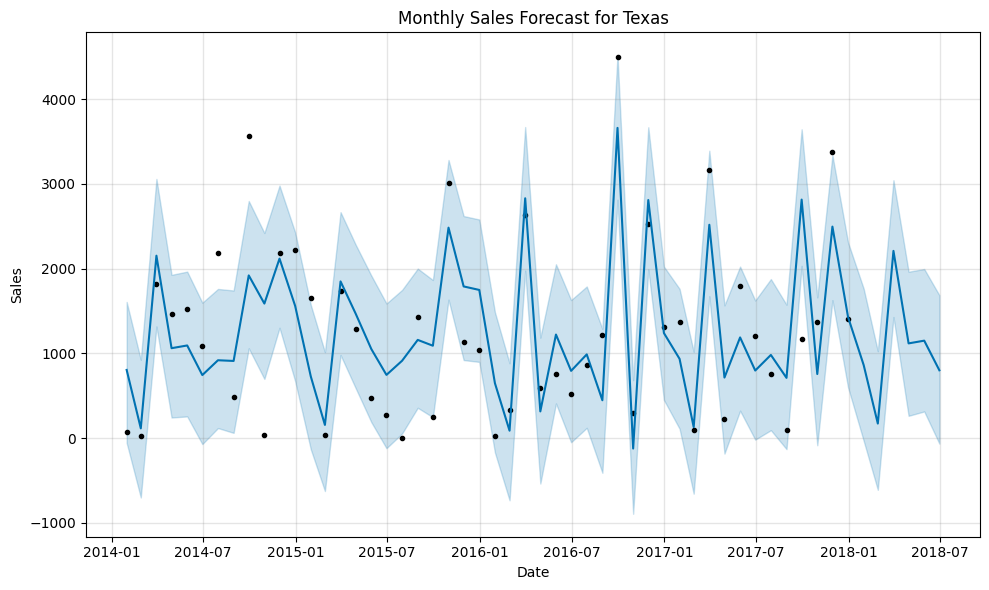

C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\830021045.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:22 - cmdstanpy - INFO - Chain [1] start processing
13:41:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


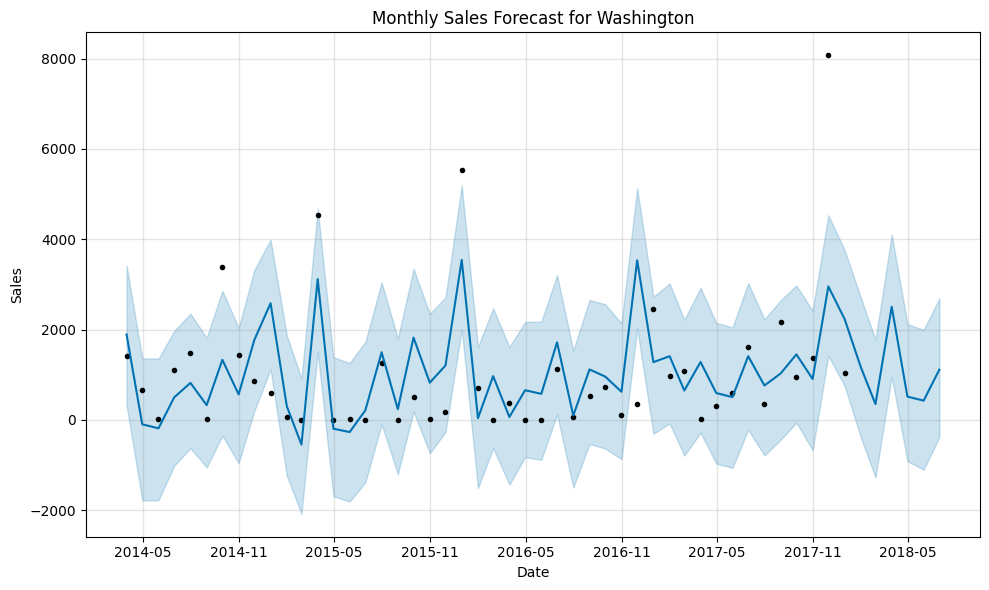

C:\Users\adjei\AppData\Local\Temp\ipykernel_27620\830021045.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:41:23 - cmdstanpy - INFO - Chain [1] start processing
13:41:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adjei\anaconda3\envs\langchain_env\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


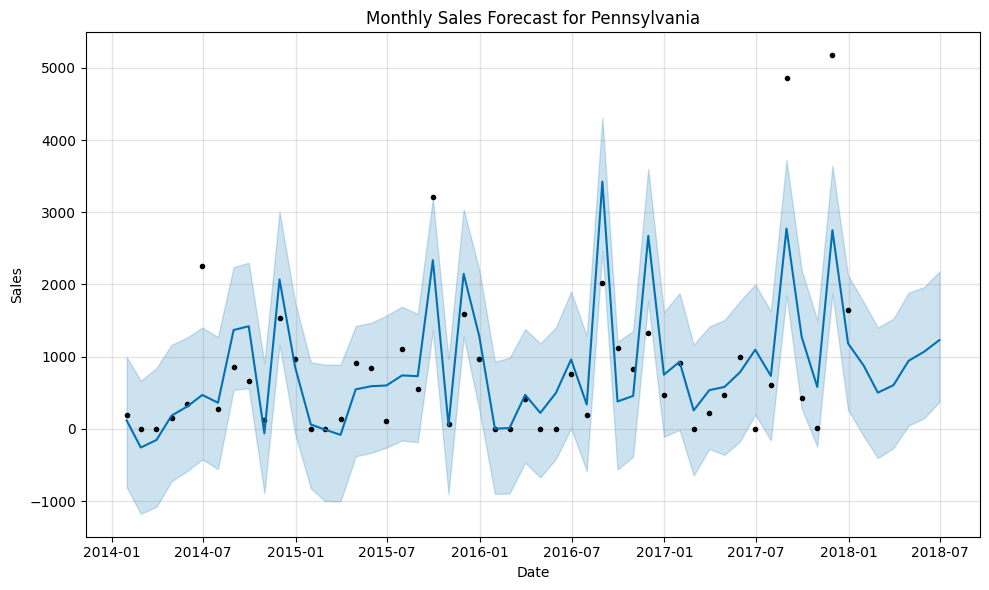

In [54]:
from prophet import Prophet

# Step 1: Top 5 states by total sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Step 2: Loop through each state
for state in top_states:
    state_df = df[df['State'] == state].copy()
    state_df['Order Date'] = pd.to_datetime(state_df['Order Date'])
    daily = state_df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
    daily.columns = ['ds', 'y']

    if len(daily) < 12:
        print(f"Skipping {state} (not enough data)")
        continue

    model = Prophet()
    model.fit(daily)

    future = model.make_future_dataframe(periods=6, freq='M')
    forecast = model.predict(future)

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Monthly Sales Forecast for {state}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.tight_layout()
    plt.show()


In [55]:
weekly_sales = df.groupby(pd.Grouper(key='Order Date', freq='W'))['Sales'].sum().reset_index()
weekly_sales.columns = ['ds', 'y']

model = Prophet()
model.fit(weekly_sales)

future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Join and evaluate MAPE
actual = weekly_sales.set_index('ds')
predicted = forecast[['ds', 'yhat']].set_index('ds')
comparison = actual.join(predicted, how='left').dropna()

mape = (abs((comparison['y'] - comparison['yhat']) / comparison['y'])).mean() * 100
print(f"Weekly MAPE: {mape:.2f}%")


13:41:24 - cmdstanpy - INFO - Chain [1] start processing
13:41:24 - cmdstanpy - INFO - Chain [1] done processing


Weekly MAPE: 171.03%


 A **MAPE of 171.03%** indicates that, on average, the Prophet model's weekly sales predictions deviate from actual values by **over 171%**.
- This level of error is **very high**, suggesting that the model is struggling to capture **week-to-week variability**, possibly due to:
- Highly volatile weekly sales patterns.
- Outliers, spikes, or unmodeled events.
- Insufficient feature inputs.


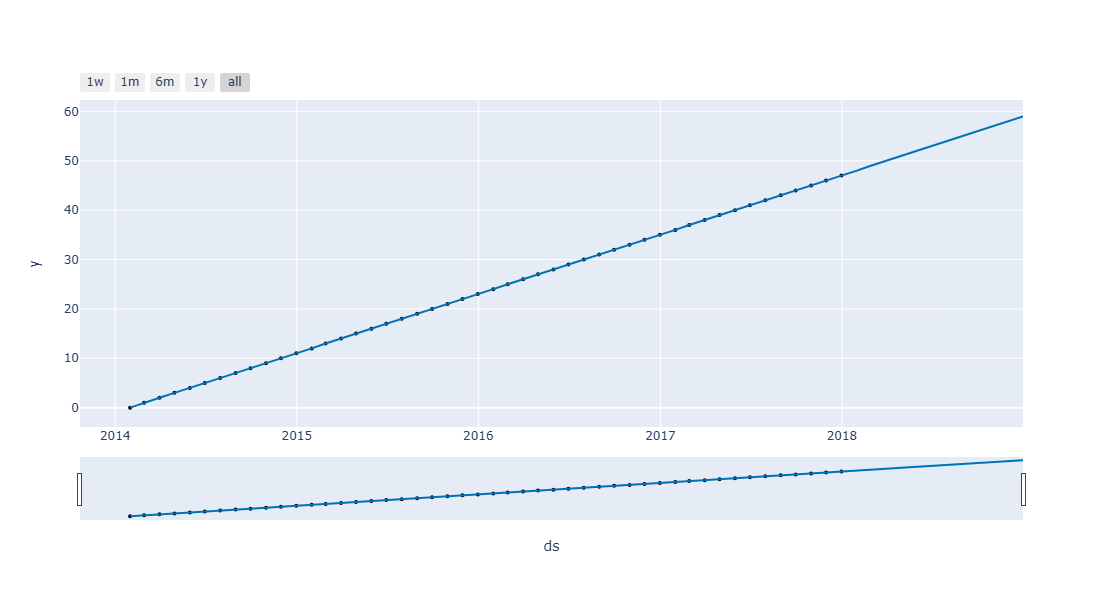

In [58]:
from prophet.plot import plot_plotly

comparison_clean = comparison[(comparison['y'] > 10) & (comparison['yhat'].notna())]
mape = (abs((comparison_clean['y'] - comparison_clean['yhat']) / comparison_clean['y'])).mean() * 100
plot_plotly(monthly_model, forecast_months)


This graph shows that Prophet believes the seasonality increases regularly over time, contributing more to sales as the years go on — which is typical in businesses that scale or grow annually.

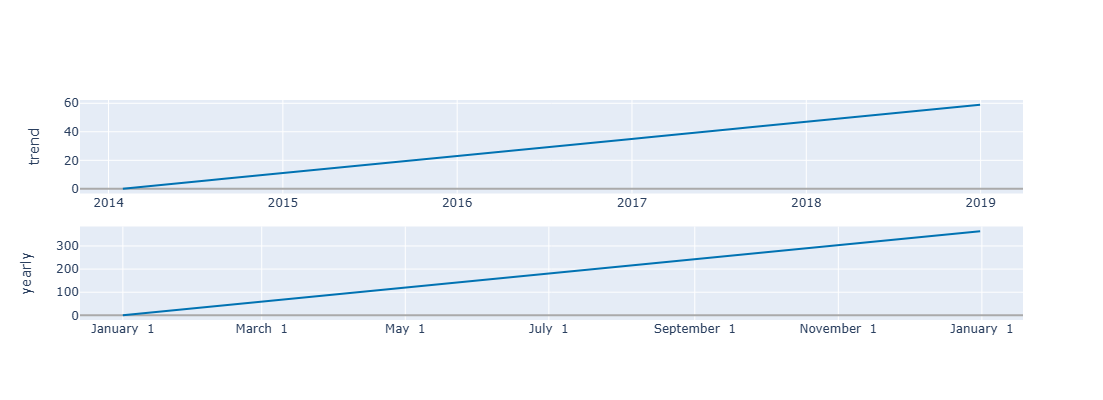

In [59]:
# Seasonality Analysis
from prophet.plot import plot_components_plotly

# Plot trend + seasonality + holidays (if added)
plot_components_plotly(monthly_model, forecast_months)


**Interpretation of the Plot Sections**:
Trend (Top Plot)

The trend line shows a gradual decline over time from 2014 to around 2018, indicating a general downward movement in monthly sales after peaking.

This could signal changes in market demand, store performance, or external economic factors.

Seasonal (Middle Plot)

The seasonal component reveals recurring monthly patterns throughout each year.

For instance, sales increase mid-year (May–August) and then drop toward the end of the year, forming a repeating wave-like shape.

Residual/Noise (Not visible in cropped image)

Usually shown in the fourth row (cut off here), it would capture irregularities or one-time events not explained by trend or seasonality.

✅ Conclusion:
This decomposition helps separate long-term trends from short-term seasonal effects in your sales data. It's useful for identifying when to forecast, promote, or investigate anomalies in business performance.


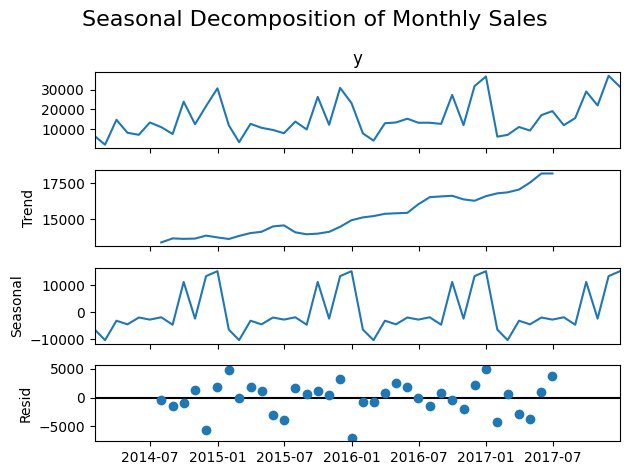

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Order Date as index if not already
monthly_sales_ts = monthly_sales.set_index('ds')['y']

decomposition = seasonal_decompose(monthly_sales_ts, model='additive', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()


### Interpretation of the Four Panels:
 
**Top Plot – Observed (y)**

This is the original monthly sales data, showing strong seasonality and a steady upward trend with spikes during high-demand months (likely holidays or promotions).

**Second Plot – Trend**

The trend line indicates a clear and consistent increase in sales over time, especially from mid-2015 onwards.

This suggests business growth or increased customer activity across the years.

**Third Plot – Seasonal**

This shows repeating patterns within each year, with predictable monthly fluctuations.

High peaks likely align with festive periods or end-of-quarter surges, and low dips with regular off-seasons.

**Bottom Plot – Residual**

The residual captures random noise or irregularities in the data that are not explained by the trend or seasonality.

While some scatter exists, it's mostly centered around 0 — a sign of a well-fitted model.

✅ Summary:
This decomposition shows that your monthly sales data is influenced by both a strong seasonal pattern and a growing trend over time.

The decomposition is useful for understanding what drives data, and it helps improve the accuracy of forecasting models like Prophet.


In [66]:
# Save the model to file
import joblib
joblib.dump(monthly_model, "prophet_monthly_model.pkl")

['prophet_monthly_model.pkl']